# Support Vector Machine

In [1]:
# import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import time
import json

In [2]:
# Load the Training and Testing Data
x_train = pd.read_pickle('data/x_train.pkl')
y_train = pd.read_pickle('data/y_train.pkl')

x_test = pd.read_pickle('data/x_test.pkl')
y_test = pd.read_pickle('data/y_test.pkl')

## Implementing Basic Support Vector Machine

In [3]:
# model
svm = SVC(random_state=1,
          kernel='rbf',
          C=1,
          gamma=0.001)

# fit the model
svm.fit(x_train, y_train)

# prediction
predictions = svm.predict(x_test)

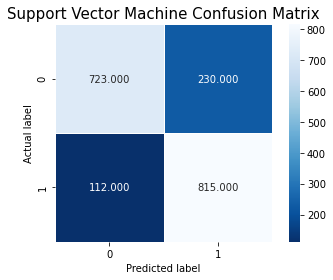

In [4]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Support Vector Machine Confusion Matrix', size = 15);
plt.show()

In [5]:
# Performance
f1_score_stroke_vanilla = f1_score(y_true=y_test, y_pred=predictions, pos_label=1)
f1_score_no_stroke_vanilla = f1_score(y_true=y_test, y_pred=predictions, pos_label=0)

f1_score_stroke_vanilla = round(f1_score_stroke_vanilla*100, 3)
f1_score_no_stroke_vanilla = round(f1_score_no_stroke_vanilla*100, 3)



print(f'F1 score for class Stroke = 1 --> {f1_score_stroke_vanilla}%')
print(f'F1 score for class Stroke = 0 --> {f1_score_no_stroke_vanilla}%')

F1 score for class Stroke = 1 --> 82.657%
F1 score for class Stroke = 0 --> 80.872%


In [6]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       953
           1       0.78      0.88      0.83       927

    accuracy                           0.82      1880
   macro avg       0.82      0.82      0.82      1880
weighted avg       0.82      0.82      0.82      1880



## Hyperparameter Tuning for Better Results

We will tune for:
- C - Regularization parameter- 0.0001 to 100 with 10x increments
- gamma - Kernel coefficient - 0.0001 to 100 with 10x increments

In [7]:
# Create a list of Regularization parameter values
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# create a list of gamma values
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

#Convert to dictionary
hyperparameters = dict(C=C, gamma=gamma)

print(hyperparameters)

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}


In [8]:
# Implement GridSearch to check and get the best hyperparameters

# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# scoring = the scoring metric, for this imbalanced classification task, i chose f1
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements
best_model = GridSearchCV(estimator=SVC(random_state=1,kernel='rbf'),
                          param_grid=hyperparameters, 
                          scoring = 'f1',
                          n_jobs=-1,
                          cv=10)

# Fit the model
best_model = best_model.fit(x_train,y_train)

In [9]:
C = best_model.best_estimator_.get_params()['C']
gamma = best_model.best_estimator_.get_params()['gamma']

print(f'Best C: {C}')
print(f'Best gamma: {gamma}')

Best C: 100
Best gamma: 0.01


## Use New Hyperparameters

In [10]:
# start timer
start_time = time.time()

# model
svm = SVC(random_state=1,
          kernel='rbf',
          C=C,
          gamma=gamma)

# fit the model
svm.fit(x_train, y_train)

# Time to train
time_to_train = round((time.time() - start_time)*1000, 3)
print(f'Time to Train --> {time_to_train} ms')

Time to Train --> 2334.035 ms


In [11]:
# start timer
start_time = time.time()

# prediction
predictions = svm.predict(x_test)

# Inference time
inference_time = round((time.time() - start_time)*1000, 3)
print(f'Inference time --> {inference_time} ms')

Inference time --> 459.87 ms


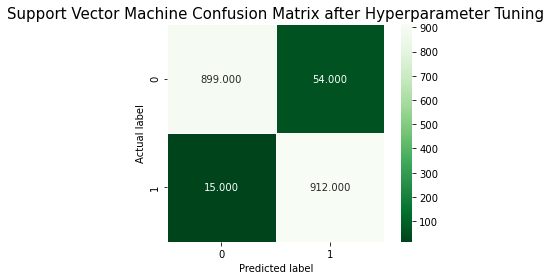

In [12]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Support Vector Machine Confusion Matrix after Hyperparameter Tuning', size = 15);
plt.show()

In [13]:
# Performance after hyperparameter tuning
f1_score_stroke_hp_tuning = f1_score(y_true=y_test, y_pred=predictions, pos_label=1)
f1_score_no_stroke_hp_tuning = f1_score(y_true=y_test, y_pred=predictions, pos_label=0)

f1_score_stroke_hp_tuning = round(f1_score_stroke_hp_tuning*100, 3)
f1_score_no_stroke_hp_tuning = round(f1_score_no_stroke_hp_tuning*100, 3)

print(f'F1 score for class Stroke = 1 --> {f1_score_stroke_hp_tuning}%')
print(f'F1 score for class Stroke = 0 --> {f1_score_no_stroke_hp_tuning}%')

F1 score for class Stroke = 1 --> 96.355%
F1 score for class Stroke = 0 --> 96.304%


In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       953
           1       0.94      0.98      0.96       927

    accuracy                           0.96      1880
   macro avg       0.96      0.96      0.96      1880
weighted avg       0.96      0.96      0.96      1880



In [15]:
# percentage improvement due to hyperparameter tuning
score_increase_stroke = round(((f1_score_stroke_hp_tuning - f1_score_stroke_vanilla)/f1_score_stroke_vanilla)*100, 3)
score_increase_no_stroke = round(((f1_score_no_stroke_hp_tuning - f1_score_no_stroke_vanilla)/f1_score_no_stroke_vanilla)*100, 3)

print(f'Percentage increase for F1 score with stroke --> {score_increase_stroke}%')
print(f'Percentage increase for F1 score without stroke --> {score_increase_no_stroke}%')

Percentage increase for F1 score with stroke --> 16.572%
Percentage increase for F1 score without stroke --> 19.082%


In [16]:
print(f1_score_stroke_vanilla)
print(f1_score_no_stroke_vanilla)
print('---------------------------------')
print(f1_score_stroke_hp_tuning)
print(f1_score_no_stroke_hp_tuning)
print('---------------------------------')
print(score_increase_stroke)
print(score_increase_no_stroke)
print('---------------------------------')
print(time_to_train)
print(inference_time)

82.657
80.872
---------------------------------
96.355
96.304
---------------------------------
16.572
19.082
---------------------------------
2334.035
459.87


## Saving numbers to JSON

Since this isnt the first model, read the previously made JSON file and then add to it

In [17]:
# read previously created JSON
with open('data.json') as json_file:
    json_dict = json.load(json_file)

# add to it
json_dict['svm'] = {
    "scores_vanilla":{"with_stroke":f1_score_stroke_vanilla, "without_stroke":f1_score_no_stroke_vanilla},
    "scores_after_hp_tuning":{"with_stroke":f1_score_stroke_hp_tuning, "without_stroke":f1_score_no_stroke_hp_tuning},
    "percentage_increase":{"with_stroke":score_increase_stroke, "without_stroke":score_increase_no_stroke},
    "time":{"time_to_train_final_model":time_to_train, "inference_time_on_final_model":inference_time}}

In [18]:
with open('data.json', 'w') as fp:
    json.dump(json_dict, fp,  indent=4)